# **Laboratório 03 - Ajuste de Curvas**

Aluno: Pedro Nascimento de Paiva Fernandes Neto

Regressão linear ou ajuste de curvas é amplamente utilizada na estatítica e aprendizagem de máquinas, principalmente para análises preditivas, como estimativas de tendências, etc. 

A forma mais elementar consiste, basicamente, no ajuste de uma reta da forma,

\begin{equation*}
y = w_0 + w_1x
\end{equation*}

a uma conjunto de pares ordenados $(x_k,y_k)_{k=1}^n$. No entanto, existem inúmeras possibilidades de ajuste, tais como:

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from IPython.display import display, Latex

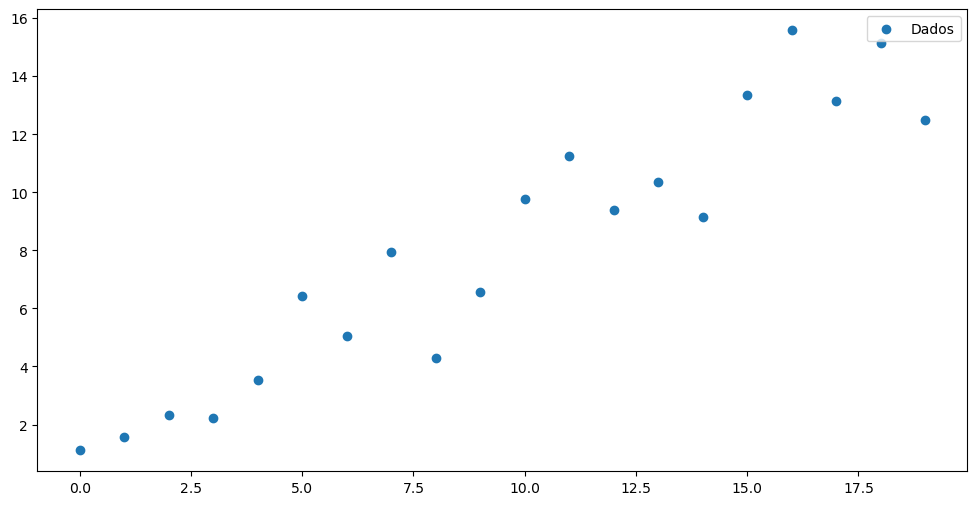

In [3]:
x = np.arange(0,20)
y1 = np.random.uniform(low=1, high=4, size=(5,))
y2 = np.random.uniform(low=4, high=8, size=(5,))
y3 = np.random.uniform(low=8, high=12, size=(5,))
y4 = np.random.uniform(low=12, high=16, size=(5,))
y = np.concatenate([y1,y2,y3,y4],axis = 0)

plt.figure(figsize = (12,6))
plt.scatter(x,y, label = 'Dados')
plt.legend()
plt.show()

A pergunta natural que surge é: Qual reta melhor se ajusta ao conjunto de pontos? 

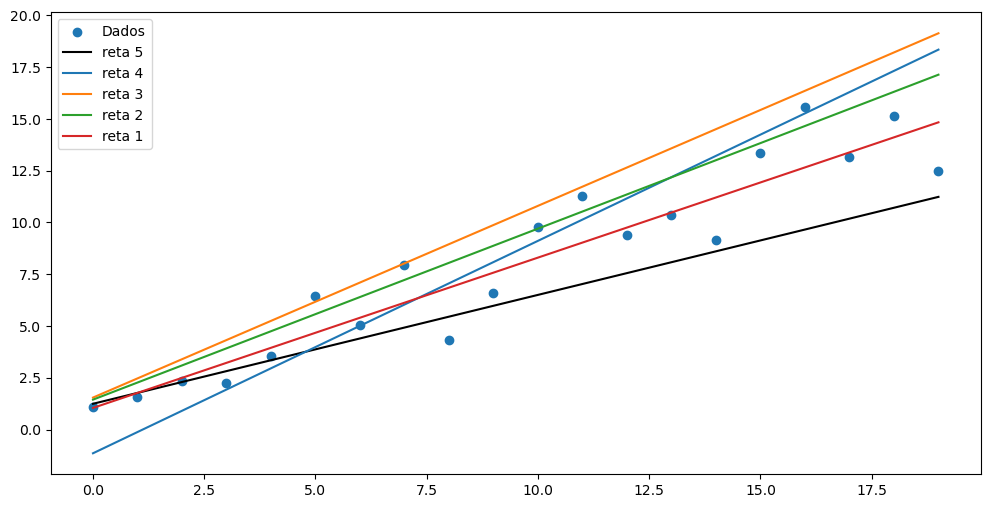

In [ ]:
ya1 = 1.045 + 0.7259*x
ya2 = 1.445 + 0.8259*x
ya3 = 1.545 + 0.9259*x
ya4 = -1.145 + 1.0259*x
ya5 = 1.245 + 0.5259*x

plt.figure(figsize = (12,6))
plt.scatter(x,y, label = 'Dados')
plt.plot(x,ya5,'k',label='reta 5')
plt.plot(x,ya4,label='reta 4')
plt.plot(x,ya3,label='reta 3')
plt.plot(x,ya2,label='reta 2')
plt.plot(x,ya1,label='reta 1')
plt.legend()
plt.show()

Para responder a pergunta iremos considerar o funcional de custo, 
baseado no erro quadrático obtido entre cada amostra e a reta a ser analisada. Ou seja,
\begin{equation}
J_e = \sum_{k=1}^n \left ( y_k - (w_0 + w_1x_k) \right )^2
\end{equation}

Para minimizar o erro, tomamos as derivadas com relação a $w_0$ e $w_1$, buscamos os pontos onde elas se anulam. Ou seja, o ponto de mínimo da função. Que correspondem a resolução do seguinte SEL:
\begin{equation}
\begin{bmatrix}
n & \sum_{k=1}^n x_k\\ 
\sum_{k=1}^n x_k & \sum_{k=1}^n \left ( x_k^2 \right ) 
\end{bmatrix}\begin{bmatrix}
w_0\\ 
w_1
\end{bmatrix} = \begin{bmatrix}
\sum_{k=1}^n y_k\\ 
\sum_{k=1}^n x_ky_k
\end{bmatrix}
\end{equation}

In [7]:
A = np.array([[len(x),sum(x)],[sum(x), sum(x*x)]])
b = [sum(y),sum(x*y)]
w = la.solve(A,b)
print('O modelo ajustado é :\n y_est = %.4f'%w[0],'+ %.4f'%w[1],'x')

O modelo ajustado é :
 y_est = 1.0138 + 0.7395 x


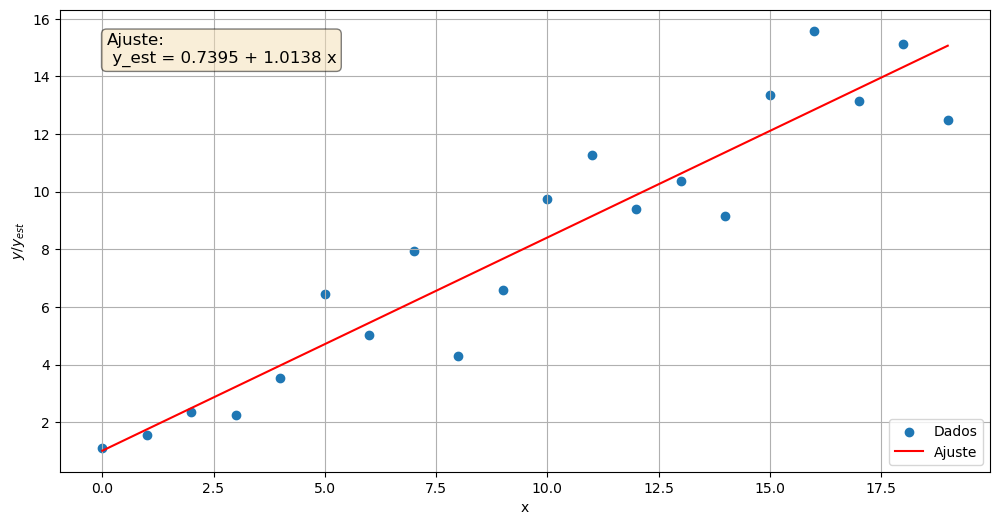

In [9]:
plt.figure(figsize = (12,6))
plt.scatter(x,y, label = 'Dados')
y_est = w[0] + w[1]*x
plt.plot(x,y_est,'r',label = 'Ajuste')
fit_label = 'Ajuste:\n y_est = %.4f + %.4f x' % (w[1], w[0])
plt.text(0.05, 0.95, fit_label, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.5))

plt.xlabel('x')
plt.ylabel('$y / y_{est}$')
plt.legend()
plt.grid()
plt.show()

**Caso geral**

Se o modelo que desejamos ajustar for uma combinação linear de várias funções $g_i(x)$ com $i = 1, \cdots, n$ na forma:
$$
y \approx f(x) = \sum_{k=0}^n w_k\,g_k(x) = w_0\,g_0(x) + w_1\,g_1(x) + \cdots + w_n\,g_n(x),
$$
onde $w_i,\;i = 1, \cdots, n$ são os parâmetros desconhecidos e, as $g_i,\;i = 1, \cdots, n$ são as funções de base. Por meio de:
$$
\begin{bmatrix}
\left \langle g_0(x),g_0(x) \right \rangle & \left \langle g_0(x),g_1(x) \right \rangle  & \cdots & \left \langle g_0(x),g_n(x) \right \rangle \\ 
\left \langle g_1(x),g_0(x) \right \rangle & \left \langle g_1(x),g_1(x) \right \rangle  & \cdots & \left \langle g_1(x),g_n(x) \right \rangle \\  
\vdots & \cdots & \ddots & \vdots\\ 
\left \langle g_n(x),g_0(x) \right \rangle & \left \langle g_n(x),g_1(x) \right \rangle  & \cdots & \left \langle g_n(x),g_n(x) \right \rangle 
\end{bmatrix}\begin{bmatrix}
w_0\\ 
w_1\\ 
\vdots\\ 
w_n
\end{bmatrix} = \begin{bmatrix}
\left \langle y,g_0(x) \right \rangle\\ 
\left \langle y,g_1(x) \right \rangle\\  
\vdots\\ 
\left \langle y,g_n(x) \right \rangle\\ 
\end{bmatrix}
$$

**Exemplo 01 :** Sejam $x,\,y$ o seguinte conjunto de pontos:

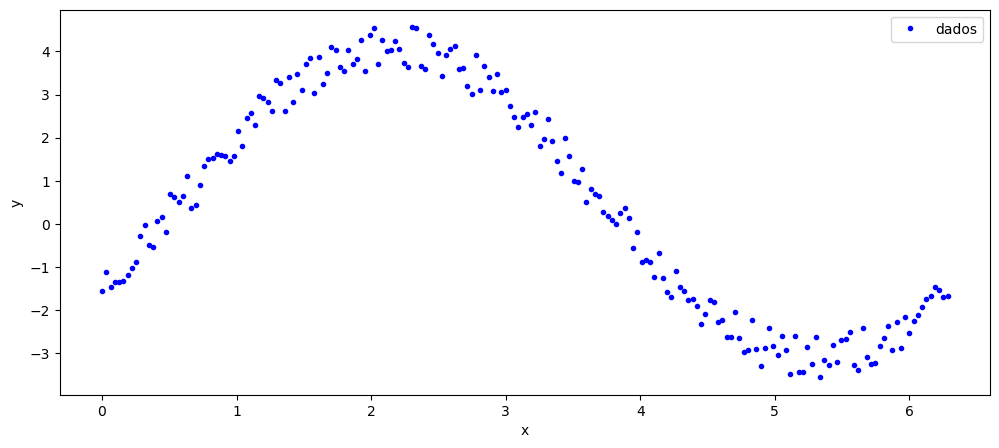

In [11]:
x = np.linspace(0, 2*np.pi, 200)
y = 3*np.sin(x) - 2*np.cos(x) + np.random.random(len(x))

plt.figure(figsize = (12, 5))
plt.plot(x,y,"b.", label = "dados")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Ajuste os dados por meio da seguinte função: $f(x) = w_0 + w_1\,sen(x) + w_2\,cos(x).$

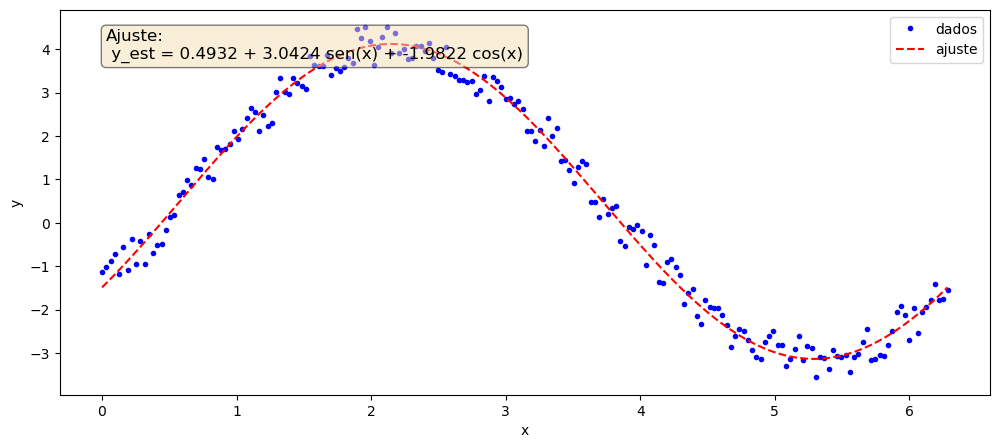

In [13]:
g0 = np.ones(len(x))
g1 = np.sin(x)
g2 = np.cos(x)

A = np.array([[g0.T@g0, g0.T@g1, g0.T@g2],
              [g1.T@g0, g1.T@g1, g1.T@g2],
              [g2.T@g0, g2.T@g1, g2.T@g2]])
b = np.array([[g0.T@y],
              [g1.T@y],
              [g2.T@y]])

w = la.inv(A)@b

x = np.linspace(0, 2*np.pi, 200)
y = 3*np.sin(x) - 2*np.cos(x) + np.random.random(len(x))
y_est = w[0]*g0 + w[1]*g1 + w[2]*g2

plt.figure(figsize = (12, 5))
plt.plot(x,y,"b.", label = "dados")
plt.plot(x,y_est,"--r", label = "ajuste")
fit_label = 'Ajuste:\n y_est = %.4f + %.4f sen(x) + %.4f cos(x)' % (
    w[0].item(), w[1].item(), w[2].item())
plt.text(0.05, 0.95, fit_label, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.5))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()



**Exemplo 01 :** Suponha a medição da temperatura ao longo de 19 horas, representadas pelo
seguinte conjunto de dados,

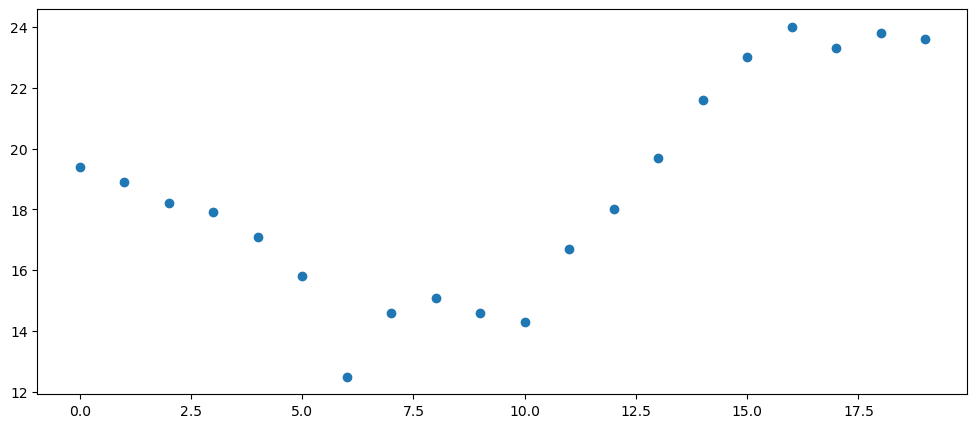

In [15]:
t = np.linspace(0,19,20) # Dados de entrada
T = np.array([19.4,18.9,18.2,17.9,17.1,15.8,12.5,14.6,15.1,14.6,14.3,
16.7,18,19.7,21.6,23,24,23.3,23.8,23.6]) # Saída ruidosa

plt.figure(figsize = (12, 5))
plt.scatter(t,T, label = 'Dados')
plt.show()

Ajuste - os por meio de uma função do tipo:
$$
f(t) = w_0 + w_1\,cos\left( \frac{2 \pi t}{N} \right) + w_2\,cos\left( \frac{4 \pi t}{N} \right) + w_3\,sen\left( \frac{4 \pi t}{N} \right).
$$

e, em seguida adapte para um ajuste polinomial de grau 4.

Qualidade do ajuste: EMQ - Erro médio quadrático.

$$
EMQ = \frac{1}{N} \sum_{k=0}^N (y_k - f(x_k))^2
$$

In [ ]:
EMQ = (1/len(t))*(sum((T - y_est)**2))
print("O Erro médio quadrático (EMQ) = %.4f" %EMQ)

### Exercícios

1. Obter a reta que melhor se ajusta ao seguinte conjunto de dados,
$$
\begin{aligned}
&\\
&\begin{array}{lllll}
\hline \hline  &  \\
\hline \text { $x_i$ }& \,\,\,\, 0 &\,\,\,\,\,\,\,\,  1 &\,\,\,\,\,\,\,\, 2 &\,\,\,\,\,\,\,\, 3 &\,\,\,\,\,\,\,\,\,\, 4 \\
\hline \text { $y(x_i)$ }& 0.98 & -3.01 & -6.99 & -11.01 & -15.00 \\
\hline
\end{array}
\end{aligned}
$$

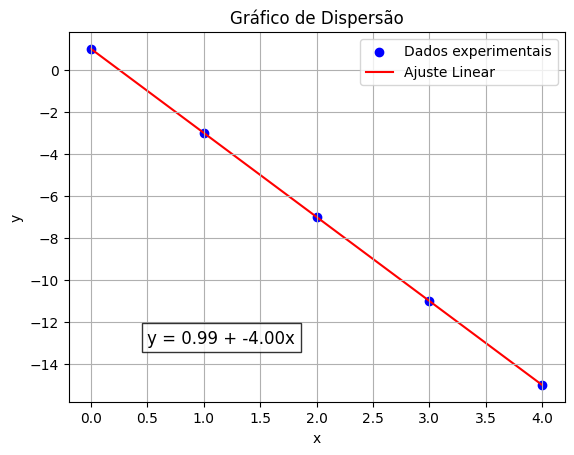

In [34]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3, 4])
y = np.array([0.98, -3.01, -6.99, -11.01, -15.00])
n = len(x)

xm = np.mean(x)
ym = np.mean(y)

b = (np.sum(x*y) - n*xm*ym) / (np.sum(x**2) - n*xm**2)
a = ym - b*xm

np.sum(x**2 - (n*xm)**2)

ajuste = a + b*x

plt.scatter(x, y, color='blue', label='Dados experimentais')
plt.plot(x, ajuste, color='red', label='Ajuste Linear', zorder=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de Dispersão')

# Adicionando a equação do ajuste ao gráfico
eq_text = f'y = {a:.2f} + {b:.2f}x'  # Formata com 2 casas decimais
plt.text(0.5, -13, eq_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.legend()
plt.grid(True)
plt.show()

2. Obter uma aproximação polinomial do tipo $f(x) = w_0 + w_1x + w_2x^2$ para o seguinte conjunto de dados,
$$
\begin{aligned}
&\\
&\begin{array}{lllll}
\hline \hline  &  \\
\hline \text { $x_i$ }& \,\,\,\, -2 &\,\,\,  -1 &\,\,\,\, 1 &\,\,\,\, 2 &\,\,\,\,\,\, 3 \\
\hline \text { $y(x_i)$ }& 13.86 & 4.935 & 5.79 & 15.99 & 32.48 \\
\hline
\end{array}
\end{aligned}
$$

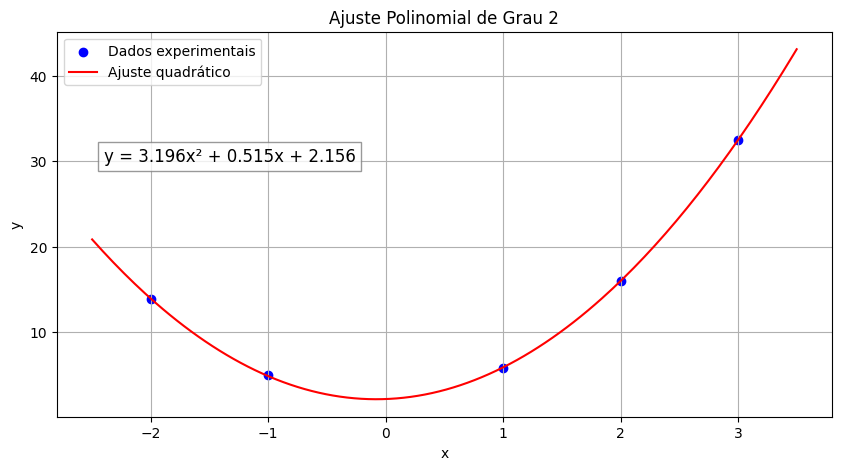

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

x = np.array([-2, -1, 1, 2, 3])
y = np.array([13.86, 4.935, 5.79, 15.99, 32.48])

g0 = np.ones_like(x)
g1 = x
g2 = x**2

A = np.array([
    [g0 @ g0, g0 @ g1, g0 @ g2],
    [g1 @ g0, g1 @ g1, g1 @ g2],
    [g2 @ g0, g2 @ g1, g2 @ g2]
])

b = np.array([
    [g0 @ y],
    [g1 @ y],
    [g2 @ y]
])

w = la.inv(A) @ b

x_plot = np.linspace(-2.5, 3.5, 200)
g0_plot = np.ones_like(x_plot)
g1_plot = x_plot
g2_plot = x_plot**2

y_est = w[0]*g0_plot + w[1]*g1_plot + w[2]*g2_plot

plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='blue', label='Dados experimentais')
plt.plot(x_plot, y_est, color='red', label='Ajuste quadrático')

# Adicionando a equação do ajuste ao gráfico
equation = f'y = {w[2][0]:.3f}x² + {w[1][0]:.3f}x + {w[0][0]:.3f}'
plt.text(-2.4, 30, equation, 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste Polinomial de Grau 2")
plt.legend()
plt.grid(True)
plt.show()

3. Encontre uma função na forma $f(x) = w_0cos(x) + w_1e^x$ que melhor se ajuste ao seguinte conjunto de dados discretos,
$$
\begin{aligned}
&\\
&\begin{array}{lllll}
\hline \hline  &  \\
\hline \text { $x_i$ }& \,\,\,\, 0 &\,\,\,  1 &\,\,\,\, 2 &\,\,\,\, 3 \\
\hline \text { $y(x_i)$ }& 3.18 & 3.9 & 6.5 & 17.82\\
\hline
\end{array}
\end{aligned}
$$

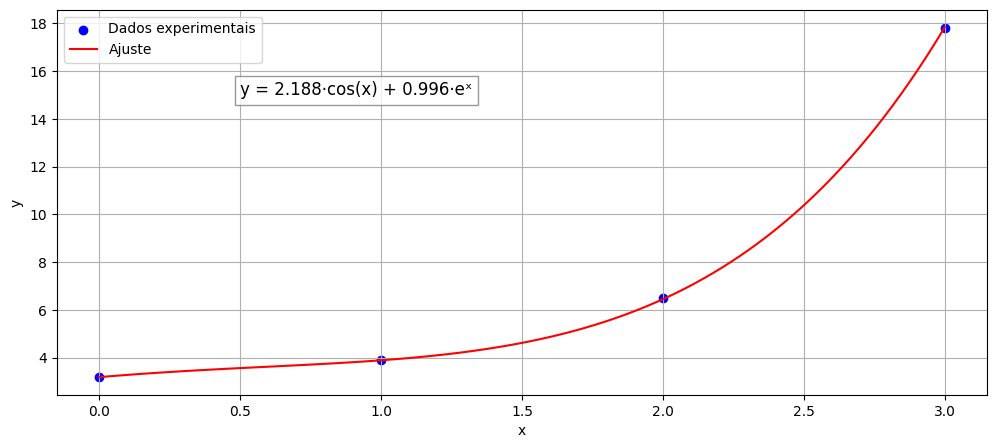

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

x = np.array([0, 1, 2, 3])
y = np.array([3.18, 3.9, 6.5, 17.82])

g0 = np.cos(x)
g1 = np.exp(x)

A = np.array([[g0.T@g0, g0.T@g1],
              [g1.T@g0, g1.T@g1]])

b = np.array([[g0.T@y],
              [g1.T@y]])

w = la.inv(A)@b

x_plot = np.linspace(0, 3, 100)
g0_plot = np.cos(x_plot)
g1_plot = np.exp(x_plot)

y_est = w[0]*g0_plot + w[1]*g1_plot

plt.figure(figsize = (12, 5))
plt.scatter(x, y, color='blue', label='Dados experimentais')
plt.plot(x_plot, y_est, label = "Ajuste", color='red')

# Adicionando a equação do ajuste
equation = f'y = {w[0][0]:.3f}·cos(x) + {w[1][0]:.3f}·eˣ'
plt.text(0.5, 15, equation, 
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

4. Ajuste o seguinte conjunto de dados utilizando as funções de base que achar conveniente.

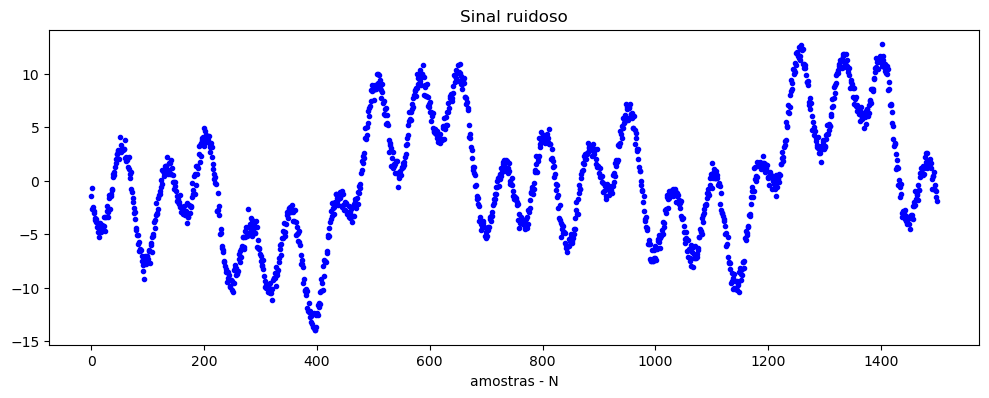

In [17]:
# criando os dados
N = 1500
t = np.linspace([-np.pi, -np.pi/2, -2*np.pi, 0],
[np.pi, np.pi/2, 2*np.pi, 2*np.pi], num = N)
x = np.sin(t) + np.cos(2*t) + np.sin(10*t) #Sinal de entrada
#x = np.sin(np.random.normal(0, 1, (N, 4))) # sinal de entrada
v = np.random.normal(0, 0.5, N) # ruído
d = 2*x[:,0] + 0.1*x[:,1] - 4*x[:,2] + 0.5*x[:,3] + v # desejado + ruído

# Resultados obtidos
plt.figure(figsize=(12,9))
plt.subplot(211);plt.title("Sinal ruidoso");plt.xlabel("amostras - N")
plt.plot(range(N), d,"b.", label="d - sinal ruidoso")
plt.show()

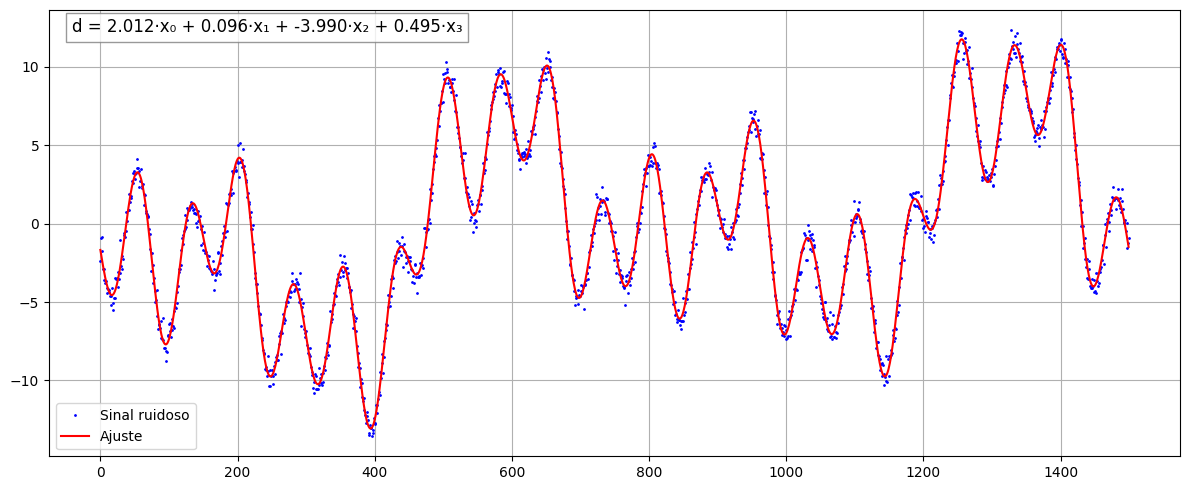

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

N = 1500
t = np.linspace([-np.pi, -np.pi/2, -2*np.pi, 0],
                [np.pi, np.pi/2, 2*np.pi, 2*np.pi], num=N)
x = np.sin(t) + np.cos(2*t) + np.sin(10*t)
v = np.random.normal(0, 0.5, N)
d = 2*x[:,0] + 0.1*x[:,1] - 4*x[:,2] + 0.5*x[:,3] + v

g0 = x[:, 0]
g1 = x[:, 1]
g2 = x[:, 2]
g3 = x[:, 3]

A = np.array([
    [g0 @ g0, g0 @ g1, g0 @ g2, g0 @ g3],
    [g1 @ g0, g1 @ g1, g1 @ g2, g1 @ g3],
    [g2 @ g0, g2 @ g1, g2 @ g2, g2 @ g3],
    [g3 @ g0, g3 @ g1, g3 @ g2, g3 @ g3],
])
b = np.array([
    [g0 @ d],
    [g1 @ d],
    [g2 @ d],
    [g3 @ d],
])

w = la.inv(A) @ b

d_est = w[0]*g0 + w[1]*g1 + w[2]*g2 + w[3]*g3

plt.figure(figsize=(12, 5))
plt.plot(range(N), d, "b.", markersize=2, label="Sinal ruidoso")
plt.plot(range(N), d_est, label="Ajuste", color='red')

equation = (f'd = {w[0][0]:.3f}·x₀ + {w[1][0]:.3f}·x₁ + ' 
            f'{w[2][0]:.3f}·x₂ + {w[3][0]:.3f}·x₃')
plt.text(0.02, 0.95, equation, 
         transform=plt.gca().transAxes,
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()